In [40]:
import pandas as pd
import petl as etl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [15]:
data=pd.read_csv('data_fix.csv')

In [16]:
data

,Unnamed: 0,movie,year,imdb,metascore,votes,duration (min),income,First genre,Second genre,Last genre,Director
0,0,Inception,2010,8.8,74,1860595,148,292.58,Action,Adventure,Sci-Fi,Christopher Nolan
1,1,Shutter Island,2010,8.1,63,1017482,138,128.01,Mystery,Thriller,NaN,Martin Scorsese
2,2,Toy Story 3,2010,8.3,92,695051,103,415.00,Animation,Adventure,Comedy,Lee Unkrich
3,3,Iron Man 2,2010,7.0,57,666427,124,312.43,Action,Adventure,Sci-Fi,Jon Favreau
4,4,Black Swan,2010,8.0,79,653745,108,106.95,Drama,Thriller,NaN,Darren Aronofsky
5,5,How to Train Your Dragon,2010,8.1,74,617114,98,217.58,Animation,Action,Adventure,Dean DeBlois
6,6,The King's Speech,2010,8.0,88,597625,118,138.80,Biography,Drama,History,Tom Hooper
7,7,The Social Network,2010,7.7,95,572873,120,96.96,Biography,Drama,NaN,David Fincher
8,8,Kick-Ass,2010,7.6,66,500465,117,48.07,Action,Adventure,Comedy,Matthew Vaughn
9,9,Despicable Me,2010,7.6,72,468665,95,251.51,Animation,Comedy,Family,Pierre Coffin


In [17]:
del data['Unnamed: 0']

In [18]:
data.corr()

,imdb,metascore,votes,duration (min),income
imdb,1.000000,0.693861,0.303596,0.325575,0.171294
metascore,0.693861,1.000000,0.165033,0.195343,0.069228
votes,0.303596,0.165033,1.000000,0.323627,0.707429
duration (min),0.325575,0.195343,0.323627,1.000000,0.254179
income,0.171294,0.069228,0.707429,0.254179,1.000000


In [19]:
data.describe()

,imdb,metascore,votes,duration (min),income
count,3976.000000,3976.000000,3.976000e+03,3976.000000,3976.000000
mean,6.399019,56.311620,5.931226e+04,105.219316,25.790709
std,0.934198,17.646215,1.189993e+05,17.524185,65.509876
min,1.500000,1.000000,6.430000e+02,40.000000,0.010000
25%,5.800000,43.000000,5.516000e+03,93.000000,0.010000
50%,6.400000,57.000000,1.477800e+04,102.000000,0.450000
75%,7.100000,69.000000,5.594475e+04,114.000000,21.127500
max,8.800000,100.000000,1.860595e+06,334.000000,936.660000


(-89.388054633353, 985.5604365842948)

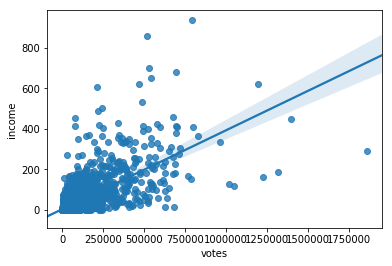

In [20]:
sns.regplot(x="votes", y="income", data=data)
plt.ylim()

In [28]:
#sort data yang memiliki nilai income terbanyak, dan ambil 2400 data teratas ke dalam variabel baru
data2400 = data.sort_values(by=['income'], ascending=False)
data_baru = pd.DataFrame(data2400.iloc[:2400]) #original :500
data_baru.to_csv('data_baru.csv')
data_baru.describe(include='object')

,movie,year,First genre,Second genre,Last genre,Director
count,2400,2400,2400,2115,1484,2400
unique,2397,10,15,37,19,1474
top,Robin Hood,2011,Comedy,Drama,Thriller,Tyler Perry
freq,2,278,515,465,243,13


In [31]:
#gabung tiga genre ke dalam satu tabel menggunakan petl
import petl as etl

filename= 'data_baru.csv'
t1 = etl.fromcsv(filename)
t1.display(10)

,movie,year,imdb,metascore,votes,duration (min),income,First genre,Second genre,Last genre,Director
2167,Star Wars: Episode VII - The Force Awakens,2015,8.0,81,790474,136,936.66,Action,Adventure,Sci-Fi,J.J. Abrams
3821,Avengers: Endgame,2019,8.6,78,516602,181,857.72,Action,Adventure,Sci-Fi,Anthony Russo
3430,Black Panther,2018,7.3,88,532002,134,700.06,Action,Adventure,Sci-Fi,Ryan Coogler
3429,Avengers: Infinity War,2018,8.5,68,694750,149,678.82,Action,Adventure,Sci-Fi,Anthony Russo
2173,Jurassic World,2015,7.0,59,543949,124,652.27,Action,Adventure,Sci-Fi,Colin Trevorrow
793,The Avengers,2012,8.0,69,1193679,143,623.36,Action,Adventure,Sci-Fi,Joss Whedon
3042,Star Wars: Episode VIII - The Last Jedi,2017,7.1,85,469911,152,620.18,Action,Adventure,Fantasy,Rian Johnson
3446,Incredibles 2,2018,7.7,80,211571,118,608.58,Animation,Action,Adventure,Brad Bird
2598,Rogue One,2016,7.8,65,484739,133,532.18,Action,Adventure,Sci-Fi,Gareth Edwards
3054,Beauty and the Beast,2017,7.2,65,242694,129,504.01,Family,Fantasy,Musical,Bill Condon


In [33]:
#hapus kolom yang tidak diperlukan
t2 = t1.cut(['movie', 'year', 'income', 'First genre','Second genre','Last genre']) #sy tambah year dan income
t2.display(10)

movie,year,income,First genre,Second genre,Last genre
Star Wars: Episode VII - The Force Awakens,2015,936.66,Action,Adventure,Sci-Fi
Avengers: Endgame,2019,857.72,Action,Adventure,Sci-Fi
Black Panther,2018,700.06,Action,Adventure,Sci-Fi
Avengers: Infinity War,2018,678.82,Action,Adventure,Sci-Fi
Jurassic World,2015,652.27,Action,Adventure,Sci-Fi
The Avengers,2012,623.36,Action,Adventure,Sci-Fi
Star Wars: Episode VIII - The Last Jedi,2017,620.18,Action,Adventure,Fantasy
Incredibles 2,2018,608.58,Animation,Action,Adventure
Rogue One,2016,532.18,Action,Adventure,Sci-Fi
Beauty and the Beast,2017,504.01,Family,Fantasy,Musical


In [34]:
#buat tabel baru hasil melting berdasarkan kolom movie
t3 = t2.melt(['movie', 'year', 'income']) #sy tambah year dan income
t3.display(10)

movie,year,income,variable,value
Star Wars: Episode VII - The Force Awakens,2015,936.66,First genre,Action
Star Wars: Episode VII - The Force Awakens,2015,936.66,Second genre,Adventure
Star Wars: Episode VII - The Force Awakens,2015,936.66,Last genre,Sci-Fi
Avengers: Endgame,2019,857.72,First genre,Action
Avengers: Endgame,2019,857.72,Second genre,Adventure
Avengers: Endgame,2019,857.72,Last genre,Sci-Fi
Black Panther,2018,700.06,First genre,Action
Black Panther,2018,700.06,Second genre,Adventure
Black Panther,2018,700.06,Last genre,Sci-Fi
Avengers: Infinity War,2018,678.82,First genre,Action


In [36]:
t3.tocsv('data_fixbaru.csv')
data = pd.read_csv('data_fixbaru.csv')

In [37]:
#bersihkan whitespace jika ada pada kolom value untuk genre
data['value'] = data['value'].str.strip()
data

,movie,year,income,variable,value
0,Star Wars: Episode VII - The Force Awakens,2015,936.66,First genre,Action
1,Star Wars: Episode VII - The Force Awakens,2015,936.66,Second genre,Adventure
2,Star Wars: Episode VII - The Force Awakens,2015,936.66,Last genre,Sci-Fi
3,Avengers: Endgame,2019,857.72,First genre,Action
4,Avengers: Endgame,2019,857.72,Second genre,Adventure
5,Avengers: Endgame,2019,857.72,Last genre,Sci-Fi
6,Black Panther,2018,700.06,First genre,Action
7,Black Panther,2018,700.06,Second genre,Adventure
8,Black Panther,2018,700.06,Last genre,Sci-Fi
9,Avengers: Infinity War,2018,678.82,First genre,Action


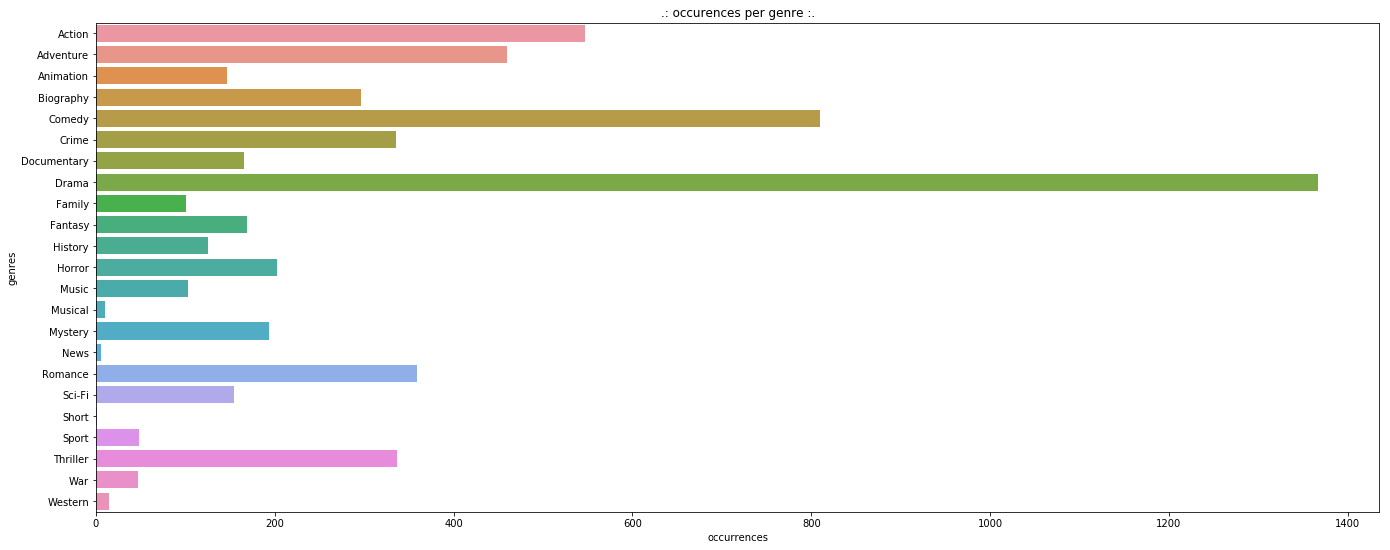

In [38]:
#lihat genre terbanyak
genre_count = data['value'].value_counts().sort_index()
df_gCount = pd.DataFrame({'value': genre_count.index, 'count': genre_count.values})

f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'count', y = 'value', data=df_gCount)
ax.set_title('.: occurences per genre :.')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()

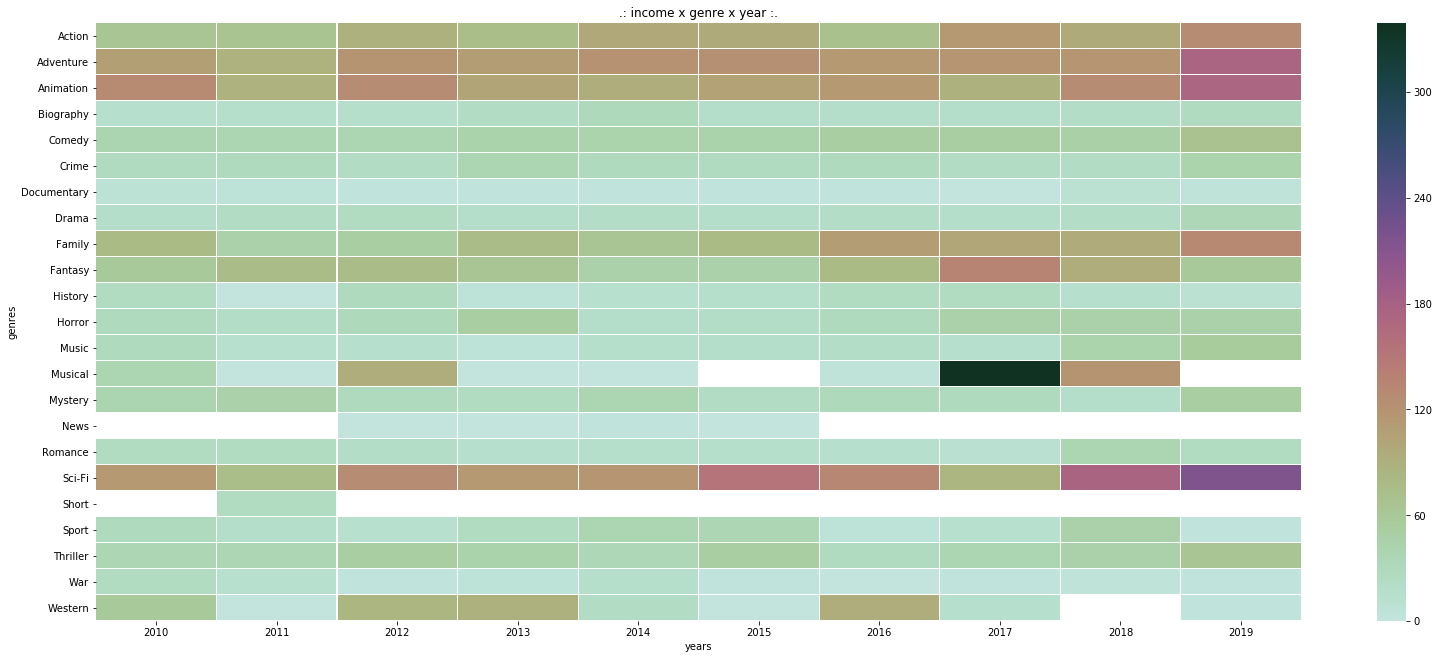

In [41]:
genre_year = data.groupby(['value', 'year']).mean().sort_index()
df_gyBudget = genre_year.pivot_table(index=['value'], columns=['year'], values='income', aggfunc=np.mean)

f, axA = plt.subplots(figsize=(27, 11), nrows=1)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(df_gyBudget, xticklabels=1, cmap=cmap, linewidths=0.05, ax=axA)

axA.set_title('.: income x genre x year :.')
axA.set_xlabel('years')
axA.set_ylabel('genres')

plt.show()

In [55]:
genre_year[120:]

income
value    year            
Music    2010   28.773750
         2011   14.558000
         2012   14.790714
         2013    5.737143
         2014   18.419000
         2015   20.289333
         2016   22.417778
         2017   17.301111
         2018   42.277273
         2019   56.890000
Musical  2010   39.440000
         2011    0.120000
         2012   93.665000
         2013    0.120000
         2014    0.140000
         2016    4.240000
         2017  339.175000
         2018  120.630000
Mystery  2010   40.502500
         2011   46.401364
         2012   28.223846
         2013   25.034000
         2014   38.654091
         2015   22.940000
         2016   30.835500
         2017   29.447308
         2018   20.478571
         2019   50.575556
News     2012    0.130000
         2013    1.090000
...                   ...
Sport    2019    2.410000
Thriller 2010   36.699375
         2011   36.267907
         2012   52.285366
         2013   44.179500
         2014   35.604737
         2015   53.050714
         2016   27.195294
         2017   37.433939
         2018   46.514865
         2019   65.495455
War      2010   23.972500
         2011   13.860000
         2012    2.378333
         2013    7.546667
         2014   18.206000
         2015    3.963750
         2016    0.415000
         2017    3.544286
         2018    5.205000
         2019    3.080000
Western  2010   59.293333
         2011    0.200000
         2012   84.355000
         2013   89.300000
         2014   22.785000
         2015    0.870000
         2016   93.430000
         2017   16.120000
         2019    1.510000

[92 rows x 1 columns]